<a href="https://colab.research.google.com/github/joaquimrafael/AI_Project/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arquivo 'petr3_4_min.csv' carregado com sucesso!

--- Análise Exploratória de Dados para PETR3 ---

2. Primeiras 5 linhas do DataFrame:
                      mask      petr4      petr3
0  2022 01 03 10 03 00.000  28.610001  30.780001
1  2022 01 03 10 04 00.000  28.620001  30.850000
2  2022 01 03 10 05 00.000  28.620001  30.860001
3  2022 01 03 10 06 00.000  28.650000  30.879999
4  2022 01 03 10 07 00.000  28.680000  30.910000

3. Informações gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95348 entries, 0 to 95347
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mask    95348 non-null  object 
 1   petr4   95348 non-null  float64
 2   petr3   95348 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.2+ MB

4. Estatísticas descritivas (colunas numéricas):
              petr4         petr3
count  95348.000000  95348.000000
mean      31.346349     34.389829
std        2.563834      2.596200
mi

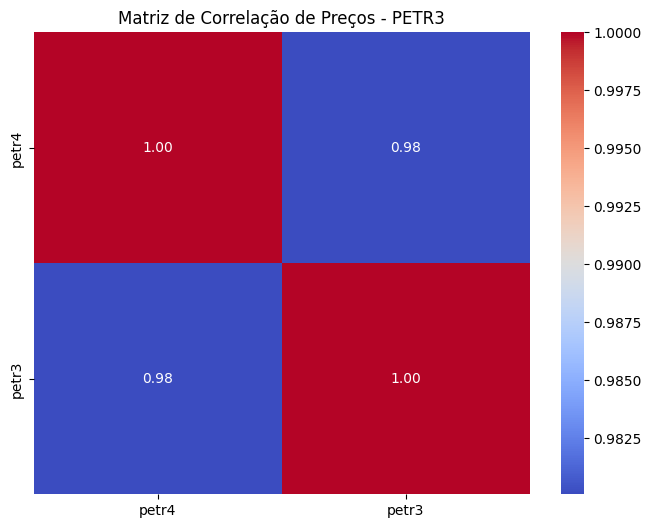


8. Plotando séries temporais dos preços:


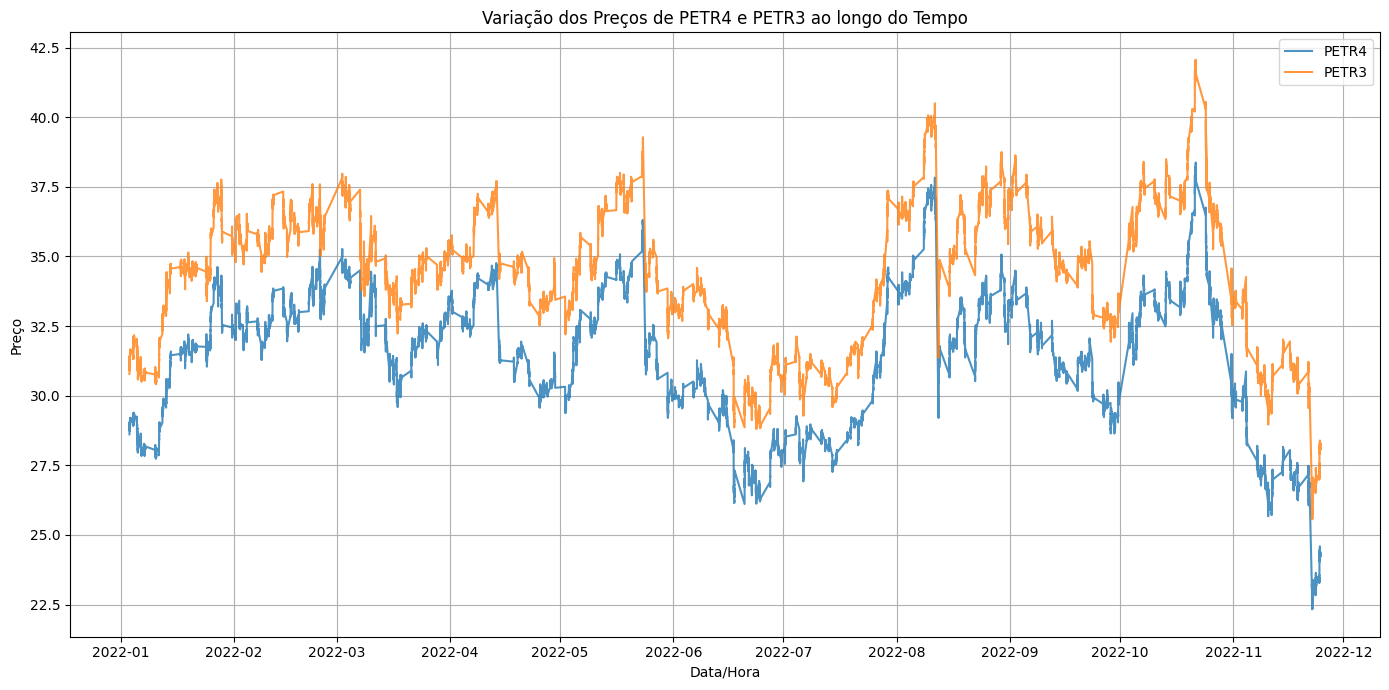


Plotando o spread (diferença de preços) entre PETR4 e PETR3:


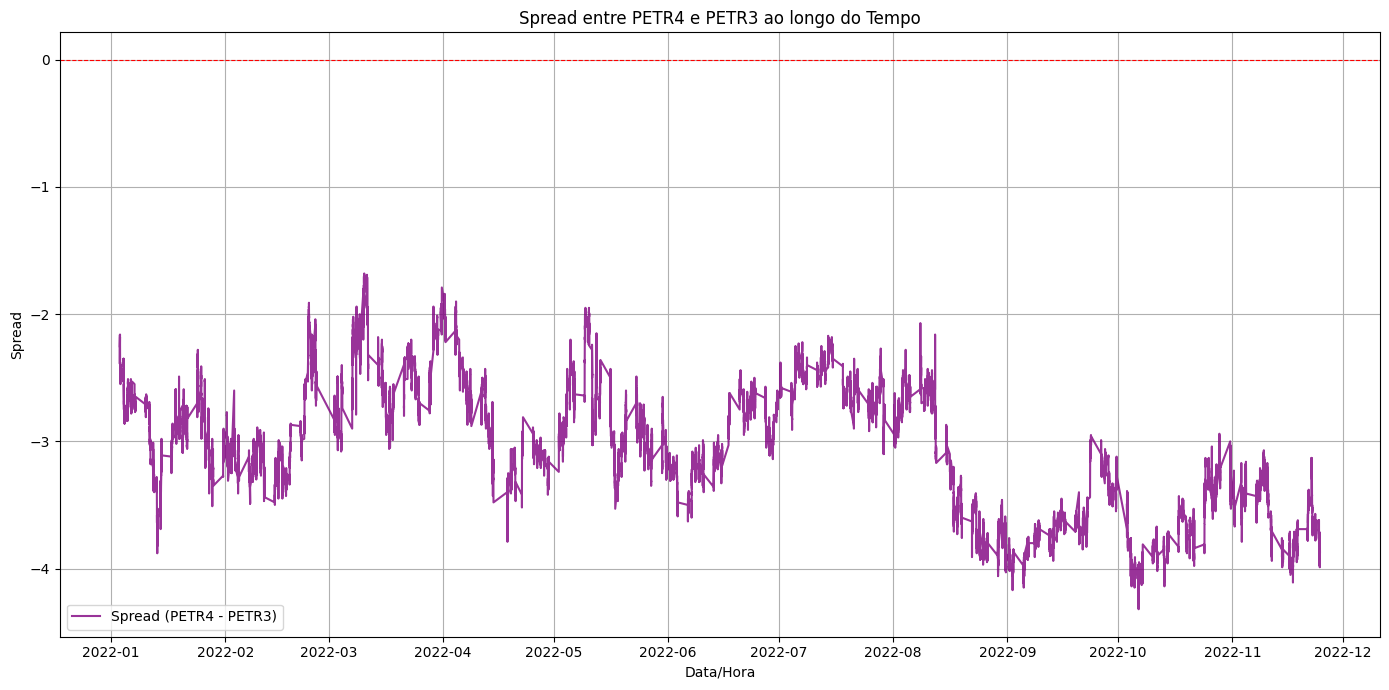

In [8]:
# ==============================================================================
# PROJETO: Análise Exploratória de Dados (EDA) de Ações da B3 para Negociação de Pares
#
# MEMBROS DO GRUPO:
# Joaquim Rafael Mariano Prieto Pereira - 10408805
# Henrique Arabe Neres de Farias - 10410152
# Gustavo Matta - 10410154
# Lucas Trebacchetti Eiras - 10401973
#
#
# SÍNTESE DO CONTEÚDO DO ARQUIVO:
# Este script Python realiza a Análise Exploratória de Dados (EDA) para os arquivos
# CSV de dados de ações da B3 (bbdc3_4_min.csv, itau3_4_min.csv, petr3_4_min.csv).
# Inclui funcionalidades para carregar dados, inspecionar a estrutura, verificar
# valores ausentes, gerar estatísticas descritivas, calcular correlações e
# visualizar séries temporais de preços e o spread entre os pares de ações.
# O objetivo é preparar os dados para modelagem de Machine Learning para
# estratégias de negociação de pares.
#
# ==============================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Carregar o arquivo CSV ---
file_path_petr3 = 'petr3_4_min.csv'
try:
    df_petr3 = pd.read_csv(file_path_petr3)
    print(f"Arquivo '{file_path_petr3}' carregado com sucesso!\n")
except FileNotFoundError:
    print(f"Erro: O arquivo '{file_path_petr3}' não foi encontrado. Verifique o caminho.\n")
    df_petr3 = None

if df_petr3 is not None:
    print("--- Análise Exploratória de Dados para PETR3 ---")

    # --- 2. Visualizar as primeiras linhas do DataFrame ---
    print("\n2. Primeiras 5 linhas do DataFrame:")
    print(df_petr3.head())

    # --- 3. Verificar informações gerais (tipos de dados, valores não nulos) ---
    print("\n3. Informações gerais do DataFrame:")
    df_petr3.info()

    # --- 4. Estatísticas descritivas básicas ---
    print("\n4. Estatísticas descritivas (colunas numéricas):")
    print(df_petr3.describe())

    # --- 5. Verificar valores ausentes ---
    print("\n5. Contagem de valores ausentes por coluna:")
    print(df_petr3.isnull().sum())

    # --- 6. Converter a coluna 'mask' para datetime (CORREÇÃO AQUI!) ---
    if 'mask' in df_petr3.columns:
        # Use o formato explícito para converter a coluna 'mask' para datetime
        df_petr3['mask'] = pd.to_datetime(df_petr3['mask'], format='%Y %m %d %H %M %S.%f', errors='coerce')
        print("\n6. Coluna 'mask' convertida para tipo datetime. Primeiras 5 linhas atualizadas:")
        print(df_petr3.head())
        print("\nVerificando valores ausentes na coluna 'mask' após a conversão:")
        print(df_petr3['mask'].isnull().sum())
        # Remover linhas onde a data não pôde ser convertida, se houver (caso errors='coerce' tenha atuado)
        df_petr3.dropna(subset=['mask'], inplace=True)
        print("Após remover NaT na coluna 'mask', o DataFrame tem", len(df_petr3), "registros.")


    # --- 7. Análise de correlação (se houver mais de uma coluna numérica relevante) ---
    numeric_cols = df_petr3.select_dtypes(include=['number']).columns
    if len(numeric_cols) > 1:
        print("\n7. Matriz de Correlação entre as colunas numéricas:")
        print(df_petr3[numeric_cols].corr())

        # Visualização da correlação com um heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(df_petr3[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Matriz de Correlação de Preços - PETR3')
        plt.show()

    # --- 8. Visualização de séries temporais (para as colunas de preço) ---
    # Certifique-se de que a coluna 'mask' é datetime e que não está vazia de NaT
    if 'mask' in df_petr3.columns and df_petr3['mask'].dtype == '<M8[ns]' and not df_petr3['mask'].isnull().all():
        print("\n8. Plotando séries temporais dos preços:")
        plt.figure(figsize=(14, 7))
        plt.plot(df_petr3['mask'], df_petr3['petr4'], label='PETR4', alpha=0.8)
        plt.plot(df_petr3['mask'], df_petr3['petr3'], label='PETR3', alpha=0.8)
        plt.title('Variação dos Preços de PETR4 e PETR3 ao longo do Tempo')
        plt.xlabel('Data/Hora')
        plt.ylabel('Preço')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Visualização do spread
        if 'petr4' in df_petr3.columns and 'petr3' in df_petr3.columns:
            df_petr3['spread'] = df_petr3['petr4'] - df_petr3['petr3']
            print("\nPlotando o spread (diferença de preços) entre PETR4 e PETR3:")
            plt.figure(figsize=(14, 7))
            plt.plot(df_petr3['mask'], df_petr3['spread'], label='Spread (PETR4 - PETR3)', color='purple', alpha=0.8)
            plt.axhline(0, color='red', linestyle='--', linewidth=0.8) # Linha zero para referência
            plt.title('Spread entre PETR4 e PETR3 ao longo do Tempo')
            plt.xlabel('Data/Hora')
            plt.ylabel('Spread')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
    else:
        print("\nNão foi possível plotar as séries temporais, a coluna 'mask' não foi convertida corretamente ou está vazia.")